# Predicting Loan Defaults Based on Customer Behavior 

# Case Study

* This provides a case study of "a "Predicting Loan Defaults Based on Customer Behavior"  project.
* by Li-Hsuan, Lin


 


## 1. The Data Analysis Problem
   
* Loan Defaults prediction data set 
* The purpose is to predict whether the company should approve an application for loan by a given individual.


    
    | Variable          | Description                                        |
    |-------------------|----------------------------------------------------|
    | Id                | Unique identifier                                  |
    | Income            | Income                                             |
    | Age               | Age                                                |
    | Experience        | Years of work experience                           |
    | Married/Single    | Marital status (Married/Single)                    |
    | House_Ownership   | House ownership status                             |
    | Car_Ownership     | Car ownership status                               |
    | Profession        | Profession or occupation                           |
    | CITY              | City                                               |
    | STATE             | State                                              |
    | CURRENT_JOB_YRS   | Years in current job                               |
    | CURRENT_HOUSE_YRS | Years in current residence                         |
    | Risk_Flag         | Risk flag indicating potential risk (1 for risk, 0 for no risk) |

   

## 2. Exploring the Data Using Pandas

### 2.1 Import the necessary modules and read the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                   # a visualisation library we have not covered in previous labs
from matplotlib import pyplot as plt    # we will also use the matplotlib visualisation library
import warnings
warnings.simplefilter('ignore', category=UserWarning)  # suppresses warning message from Seaborn

# command below ensures matplotlib output can be included in Notebook

%matplotlib inline

In [2]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# Get the absolute path of "Training Data.csv"
file_path = os.path.abspath("Training Data.csv")
print("File absolute path:", file_path)


Current working directory: /Users/linlihsuan/Desktop/Linda/QMUL/Data Analysis/coursework1
File absolute path: /Users/linlihsuan/Desktop/Linda/QMUL/Data Analysis/coursework1/Training Data.csv


In [3]:
df = pd.read_csv('/Users/linlihsuan/Desktop/Linda/QMUL/Data Analysis/Lab_5_files_v2.1/Training Data.csv') # load the data set into a dataFrame

### 2.2 Exploring size of data and variable types

In [4]:
df.columns # Listing the dataframe columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [5]:
df.dtypes # returns the datatype of each column - Pandas sets type from values it finds in data file

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [6]:
df.shape # returns the shape of data - 614 rows, and 13 columns

(252000, 13)

### 2.3 Preliminary exploration of values in the data

In [7]:
df.head(5) # Let's view the first few rows of the dataFrame

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [8]:
df.describe() # Let's view the description of the numerical values in the data set (does not show categorical variables)

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [9]:
df.info() # This pandas function returns the data types associated with each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### 2.4 Distributions of categorical values

In [10]:
print('ID is non-numeric and is unique for each row: {} different values ... so we can drop it'
      .format(len(df['Id'].unique())))
df = df.drop(['Id'], axis=1)

ID is non-numeric and is unique for each row: 252000 different values ... so we can drop it


In [11]:
print('Values and counts for Risk Flag are:\n{}'.format(df['Risk_Flag'].value_counts()))
print('Values and normalised counts for Risk_Flag are:\n{}'.format(df['Risk_Flag'].value_counts(normalize=True)))

Values and counts for Risk Flag are:
Risk_Flag
0    221004
1     30996
Name: count, dtype: int64
Values and normalised counts for Risk_Flag are:
Risk_Flag
0    0.877
1    0.123
Name: proportion, dtype: float64


### 2.5 Distributions of continuous variables

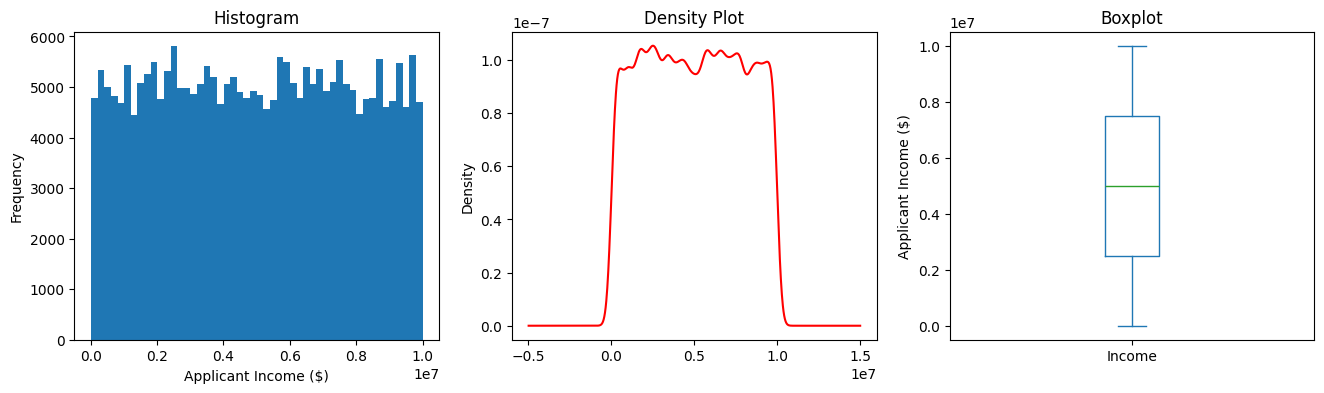

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
df['Income'].plot(kind='hist', bins=50, ax=axes[0], xlabel="Applicant Income ($)",
                           title="Histogram")
df['Income'].plot(kind='density', color='r', ax=axes[1], title='Density Plot')
df['Income'].plot(kind='box', ax=axes[2], ylabel='Applicant Income ($)',
                           xlabel='', title='Boxplot')
plt.show()

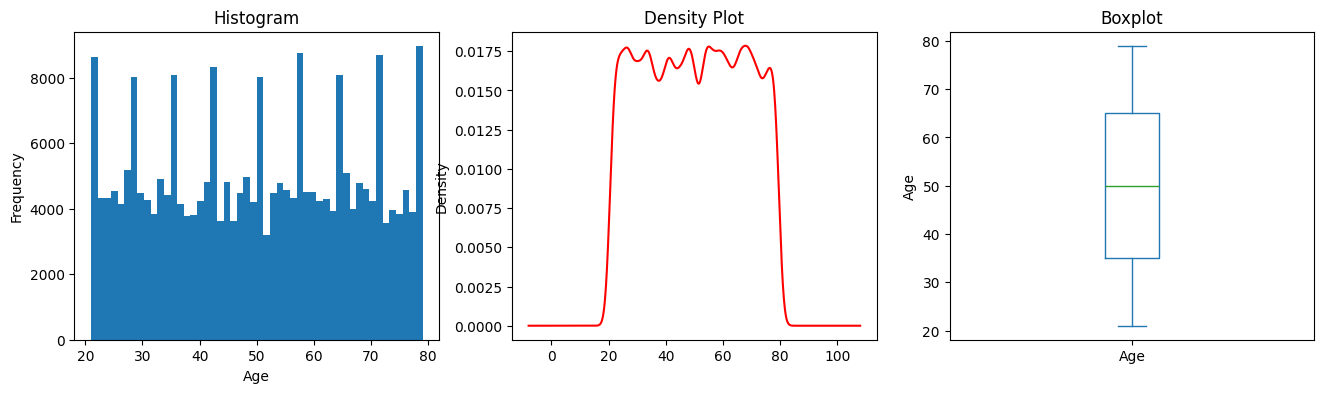

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
df['Age'].plot(kind='hist', bins=50, ax=axes[0], xlabel="Age",
                           title="Histogram")
df['Age'].plot(kind='density', color='r', ax=axes[1], title='Density Plot')
df['Age'].plot(kind='box', ax=axes[2], ylabel='Age',
                           xlabel='', title='Boxplot')
plt.show()

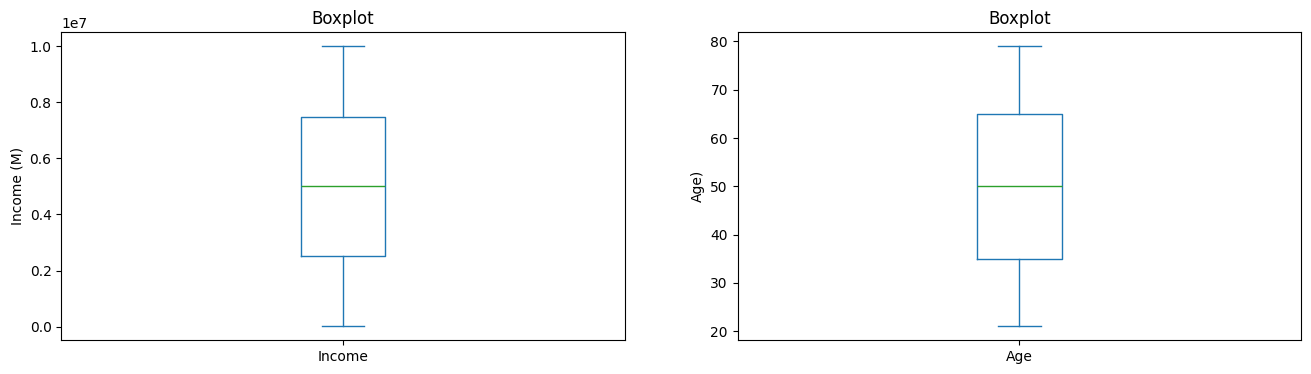

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['Age'].plot(kind='box', ax=axes[1], ylabel='Age)',
                           xlabel='', title='Boxplot')

df['Income'].plot(kind='box', ax=axes[0], ylabel='Income (M)',
                           xlabel='', title='Boxplot')
plt.show()

### 2.6 Bivariate Analysis - does a categorical variable look predictive of risk fleg



Counts for Married/Single vs Loan_Status are:
Risk_Flag            0      1
Married/Single               
married          23092   2636
single          197912  28360

Normalised counts for Married_Single vs Loan_Status are:
Risk_Flag              0         1
Married/Single                    
married         0.897544  0.102456
single          0.874664  0.125336
Counts for House_Ownership vs Loan_Status are:
Risk_Flag             0      1
House_Ownership               
norent_noown       6469    715
owned             11758   1160
rented           202777  29121

Normalised counts for House_Ownership vs Loan_Status are:
Risk_Flag               0         1
House_Ownership                    
norent_noown     0.900473  0.099527
owned            0.910203  0.089797
rented           0.874423  0.125577
Counts for Car_Ownership vs Loan_Status are:
Risk_Flag           0      1
Car_Ownership               
no             153439  22561
yes             67565   8435

Normalised counts for Car_Ownersh

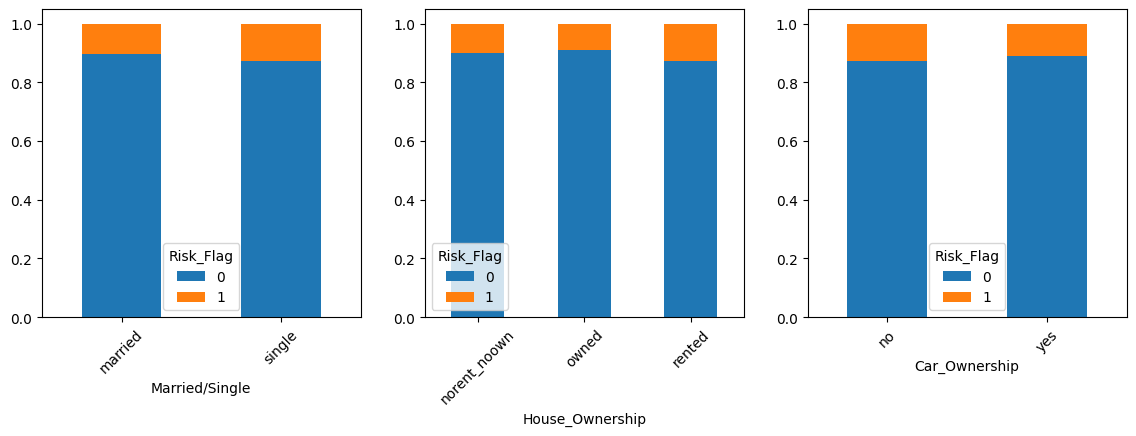

In [15]:
Married_Single=pd.crosstab(df['Married/Single'],df['Risk_Flag'])
print('Counts for Married/Single vs Loan_Status are:\n{}'.format(Married_Single))

Married_Single = Married_Single.div(Married_Single.sum(1).astype(float), axis=0)
print('\nNormalised counts for Married_Single vs Loan_Status are:\n{}'.format(Married_Single))

House_Ownership=pd.crosstab(df['House_Ownership'],df['Risk_Flag'])
print('Counts for House_Ownership vs Loan_Status are:\n{}'.format(House_Ownership))

House_Ownership = House_Ownership.div(House_Ownership.sum(1).astype(float), axis=0)
print('\nNormalised counts for House_Ownership vs Loan_Status are:\n{}'.format(House_Ownership))

Car_Ownership=pd.crosstab(df['Car_Ownership'],df['Risk_Flag'])
print('Counts for Car_Ownership vs Loan_Status are:\n{}'.format(Car_Ownership))

Car_Ownership = Car_Ownership.div(Car_Ownership.sum(1).astype(float), axis=0)
print('\nNormalised counts for Car_Ownership vs Loan_Status are:\n{}'.format(Car_Ownership))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

Married_Single.plot(kind="bar",stacked=True, ax=axes[0])
House_Ownership.plot(kind="bar",stacked=True, ax=axes[1])
Car_Ownership.plot(kind="bar",stacked=True, ax=axes[2])
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='x', rotation=45)
plt.show()


In [16]:
print(len(df.Profession.unique()))
print(len(df.STATE.unique()))
print(len(df.CITY.unique()))

51
29
317


## 3. Preprocessing data using Pandas
### 3.1 Missing value imputation

In [17]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [18]:
# No missing values need to be filled. 

### 3.2 Convert categorical variables to integer ones

In [19]:
print('Married/Single is originally a string variable:\n{}'.format(df['Married/Single'].value_counts()))
df['Married/Single'] = df['Married/Single'].astype('category').cat.codes
print('\nMarried/Single is converted to integer:\n{}'.format(df['Married/Single'].value_counts()))

# do the rest of the categorical variables
for n in ['House_Ownership','Profession','CITY','STATE','Car_Ownership']:
    
    df[n] = df[n].astype('category').cat.codes
    
print('\nData frame with categorical variables converted to integers:')
df.head()

Married/Single is originally a string variable:
Married/Single
single     226272
married     25728
Name: count, dtype: int64

Married/Single is converted to integer:
Married/Single
1    226272
0     25728
Name: count, dtype: int64

Data frame with categorical variables converted to integers:


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


## 4. Feature Selection

### 4.1 Look at correlations between each pair of variables using Pandas

Let's view the correlation between every pair of variables using Pandas
 * used ***dataframe*.corr()** - note only looks at numeric variables, so do this after you've converted categorical variables to integer

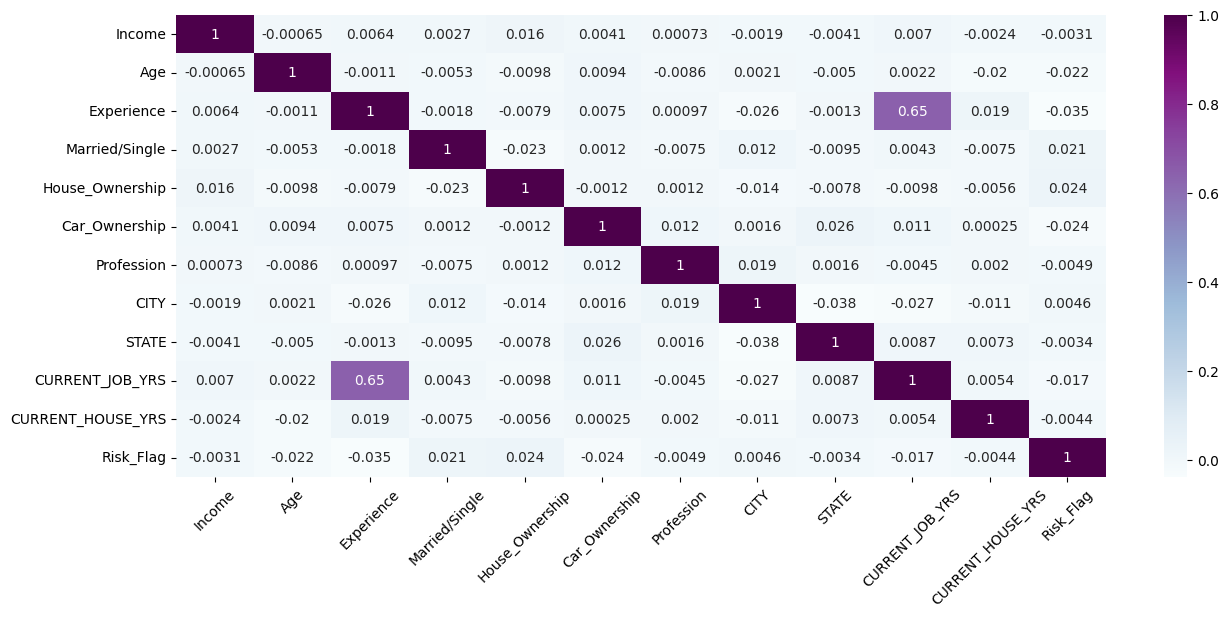

In [20]:
corr=df.corr() # gives us the correlation values
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot = True, cmap="BuPu")  # let's visualise the correlation matrix
plt.xticks(rotation=45)
plt.show()


**Observation**
 1. Consider dropping CURRENT_JOB_YRS as it is quite strongly correlated with Experience.

Let's drop some feature variables that seem to be highly correlated with other features and are therefore maybe not providing any useful extra information.

In [21]:
# Let's drop the CURRENT_JOB_YRS features below
cols = ['CURRENT_JOB_YRS']
df = df.drop(columns=cols,axis=1)

### 4.2 Look at how strongly the remaining feature variables are associated with the target variable using Scikit-learn

This is an alternative/additional way of choosing some feature variables to drop using Scikit-Learn methods. The intuition is that feature variables which are not strongly associated with the target variable won't be very useful in predicting it and so are candidates to be dropped.

In [22]:
# Split dataframe into feature variable inputs 'X' dataframe, and output target variable 'y' Series

X = df.drop(['Risk_Flag'],axis=1)
y = df['Risk_Flag']

The first two methods below measure correlation between each feature variable and the target variable, but you can specify the correlation test. The chi2 (chi-squared) test is a standard linear correlation test, whereas the ftest is better at spotting non-linear correlations.

The **SelectKBest** method just returns the 'k' variables most highly correlated with the target, but here we are choosing to retrun them all.

In [23]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

# let's call the k-best method with Chi-squared score and pass X and y as inputs

chi2 = SelectKBest(score_func = chi2, k = 'all').fit(X,y)

# create Series with variable name as index, and scores as values, and sort lowest to highest ready for plotting

chi2_sorted = pd.Series(data=chi2.scores_, index=X.columns).sort_values()

# Repeat but with other scoring functions

ftest = SelectKBest(score_func = f_classif, k = 'all').fit(X,y)
ftest_sorted = pd.Series(data=ftest.scores_, index=X.columns).sort_values()

mitest = SelectKBest(score_func = mutual_info_classif, k = 'all').fit(X,y)
mitest_sorted = pd.Series(data=mitest.scores_, index=X.columns).sort_values()

Instead of using correlation tests to show how strongly feature variables are associated with the target variable we can use some machine learning approaches which provide information about how strongly each target variable **as a by-product** of learning a predictive model. Here we use the ExtraTreesClassifier and MutualInformationClassifier.

In [24]:
from sklearn.ensemble import ExtraTreesClassifier # this is a method alternative to k-best

xtrees = ExtraTreesClassifier().fit(X, y)
xtrees_sorted = pd.Series(data=xtrees.feature_importances_, index=X.columns).sort_values()
from sklearn.feature_selection import mutual_info_classif

muinfo = mutual_info_classif(X,y)
muinfo_sorted = pd.Series(data=muinfo, index=X.columns).sort_values()

Let's plot out the strength of association of the feature variables with the target variable using the four methods we've just run.

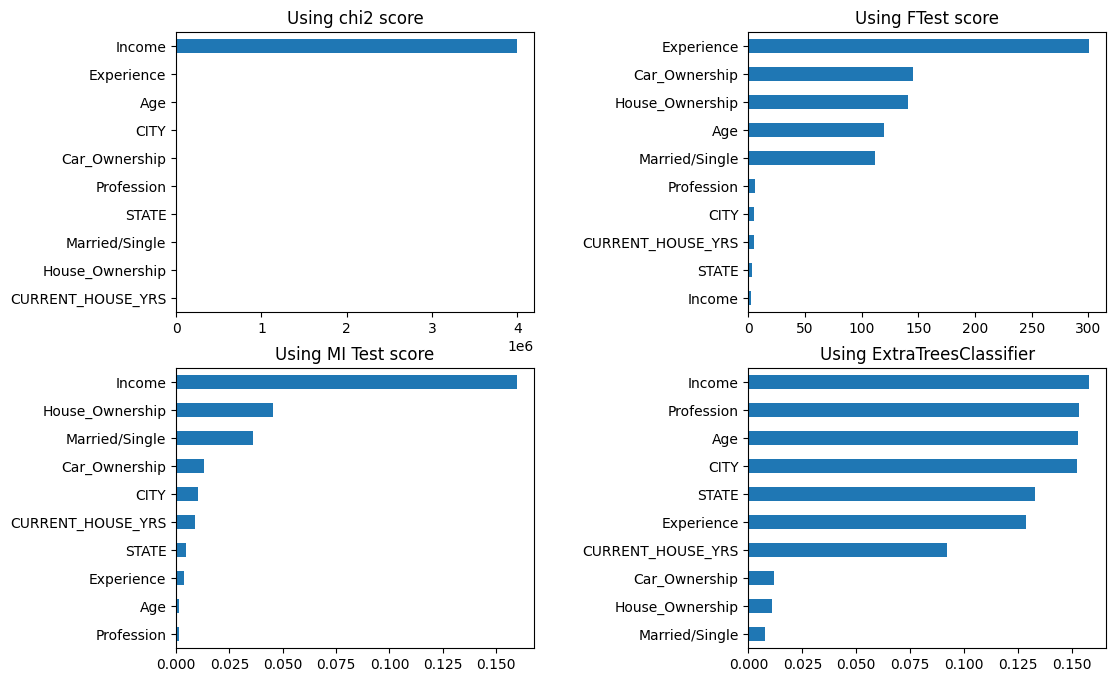

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.6)
chi2_sorted.plot(kind='barh', ax=axes[0, 0], title='Using chi2 score')
ftest_sorted.plot(kind='barh', ax=axes[0, 1], title='Using FTest score')
xtrees_sorted.plot(kind='barh', ax=axes[1, 1], title='Using ExtraTreesClassifier')
mitest_sorted.plot(kind='barh', ax=axes[1, 0], title='Using MI Test score')
plt.show()

**Observation**
 1. Income gets a high score on all measures and so is very predictive feature.


Except for Current_Job_Yrs always being most strongly associated with Experience these four approaches don't have much else in common, so let's not delete any more feature variables.

## 5. Prediction and Evaluation using Scikit-Learn

In [26]:
# for this, we will import another library so that we don`t have to code everything from scratch
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
    recall_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [27]:
def train_and_evaluate(model, X, y):
    """
        Train and evaluate a classification model on training data
        and produce accuracy metrics for a separate test set.
    """

    print('\nResults from algorithm {}:'.format(model))

    # Split data into train and test - we will use test for the final accuracy metrics
    # and not use it to train the model. This is good practice, particularly when you are
    # using cross-validation to select model parameters ... that way, the characteristics
    # of the test data don't leak into the model training
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    
    # Cross-validation accuracy gives an indication of variation in accuracy and a better
    # estimate for overall accuracy than just a single estimate. The mean cross-validation
    # accuracy is therefore a better guide when selecting model parameters or comparing models
    # cross_val_score
    # scoring
    # cv=5 
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') 
    print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'
          .format(np.mean(scores), np.std(scores))) 

    # Fit model using all of the reserved training data ... look at training accuracy 
    # which we generally expect to be better than test accuracy

    learnt_model = model.fit(X_train, y_train)
    print('\nAccuracy on training data is {:.3f}\n'.format(model.score(X_train, y_train)))
    
    # User predict() to predict target values from test feature variables, and then
    # use functions to compute evaluation metrics relevant to binary outcome variable

    y_pred = model.predict(X_test) 
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred),
                  precision_score(y_true=y_test, y_pred=y_pred),
                  recall_score(y_true=y_test, y_pred=y_pred)))
    
    # Draw out a confusion matrix
    
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(3, 3))
    ax = sns.heatmap(cm,annot=True, xticklabels=['N', 'Y'], cbar=False,
                     yticklabels=['N', 'Y'], square=True,
                     linewidths=8.0, fmt='d') # plots the confusion matrix
    ax.set_xlabel('Predicted Red Flag')
    ax.set_ylabel('Actual Red Flag')
    plt.show()
    
    return learnt_model


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


Results from algorithm KNeighborsClassifier():
Mean cross-validation accuracy is 0.889 with SD 0.001

Accuracy on training data is 0.899

Test data metrics: accuracy=0.890, f1=0.525, precision=0.564, recall=0.491


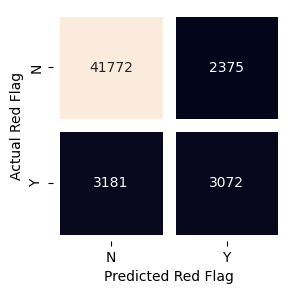

In [29]:
# and now try K-nearest neighbour

from sklearn.neighbors import KNeighborsClassifier
_ = train_and_evaluate(KNeighborsClassifier(), X, y)


Results from algorithm DecisionTreeClassifier():
Mean cross-validation accuracy is 0.881 with SD 0.001

Accuracy on training data is 0.936

Test data metrics: accuracy=0.880, f1=0.541, precision=0.516, recall=0.568


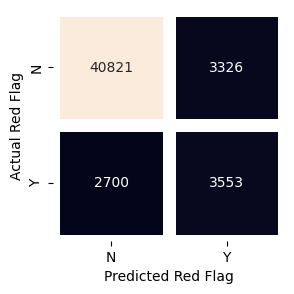

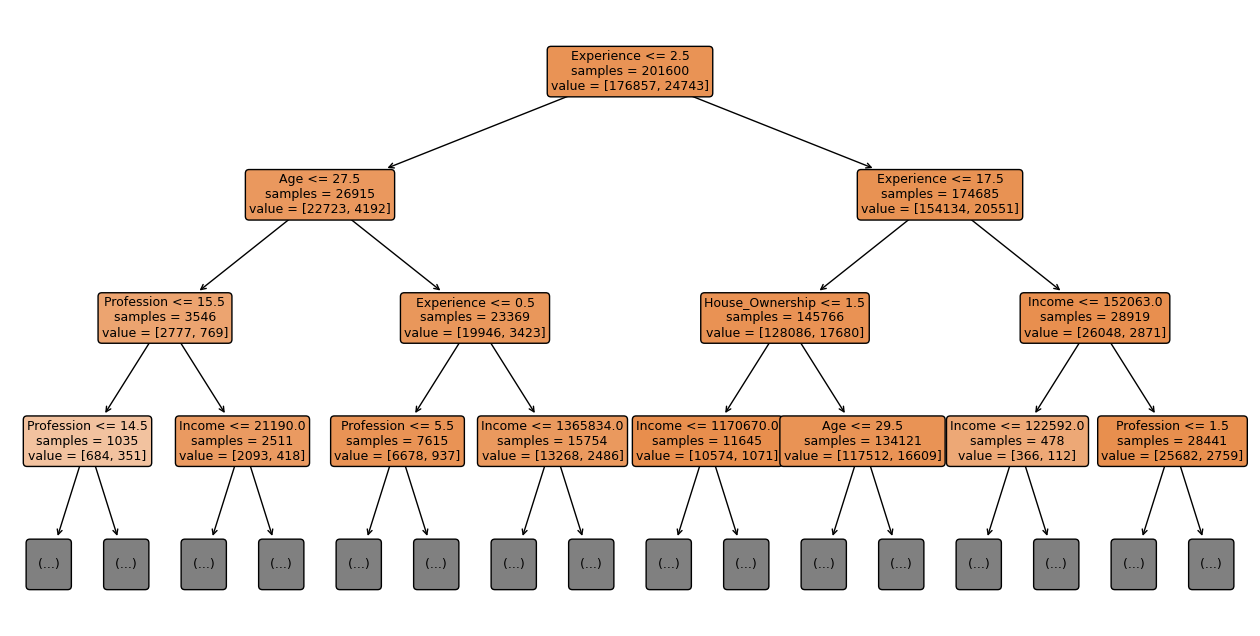

In [31]:
# and finally a decision tree

from sklearn.tree import DecisionTreeClassifier, plot_tree
learnt_model = train_and_evaluate(DecisionTreeClassifier(), X, y)
plt.figure(figsize=(16, 8))
plot_tree(learnt_model, max_depth=3, feature_names=list(X.columns),
          fontsize=9, filled=True, impurity=False, rounded=True)
plt.show()